In [86]:
import stim
print('stim:',stim.__version__)
import pymatching
print('pymatching:',pymatching.__version__)

stim: 1.16.dev0
pymatching: 2.3.1


stim.Circuit('''
    R 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
    TICK
    DEPOLARIZE1(0.02) 0 2 4 6 8 10 12 14 16
    CX 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
    TICK
    CX 2 1 4 3 6 5 8 7 10 9 12 11 14 13 16 15
    TICK
    X_ERROR(0.01) 1 3 5 7 9 11 13 15
    MR 1 3 5 7 9 11 13 15
    DETECTOR(1, 0) rec[-8]
    DETECTOR(3, 0) rec[-7]
    DETECTOR(5, 0) rec[-6]
    DETECTOR(7, 0) rec[-5]
    DETECTOR(9, 0) rec[-4]
    DETECTOR(11, 0) rec[-3]
    DETECTOR(13, 0) rec[-2]
    DETECTOR(15, 0) rec[-1]
    REPEAT 24 {
        TICK
        DEPOLARIZE1(0.02) 0 2 4 6 8 10 12 14 16
        CX 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
        TICK
        CX 2 1 4 3 6 5 8 7 10 9 12 11 14 13 16 15
        TICK
        X_ERROR(0.01) 1 3 5 7 9 11 13 15
        MR 1 3 5 7 9 11 13 15
        SHIFT_COORDS(0, 1)
        DETECTOR(1, 0) rec[-8] rec[-16]
        DETECTOR(3, 0) rec[-7] rec[-15]
        DETECTOR(5, 0) rec[-6] rec[-14]
        DETECTOR(7, 0) rec[-5] rec[-13]
        DETECTOR(9, 0) rec[-4] r

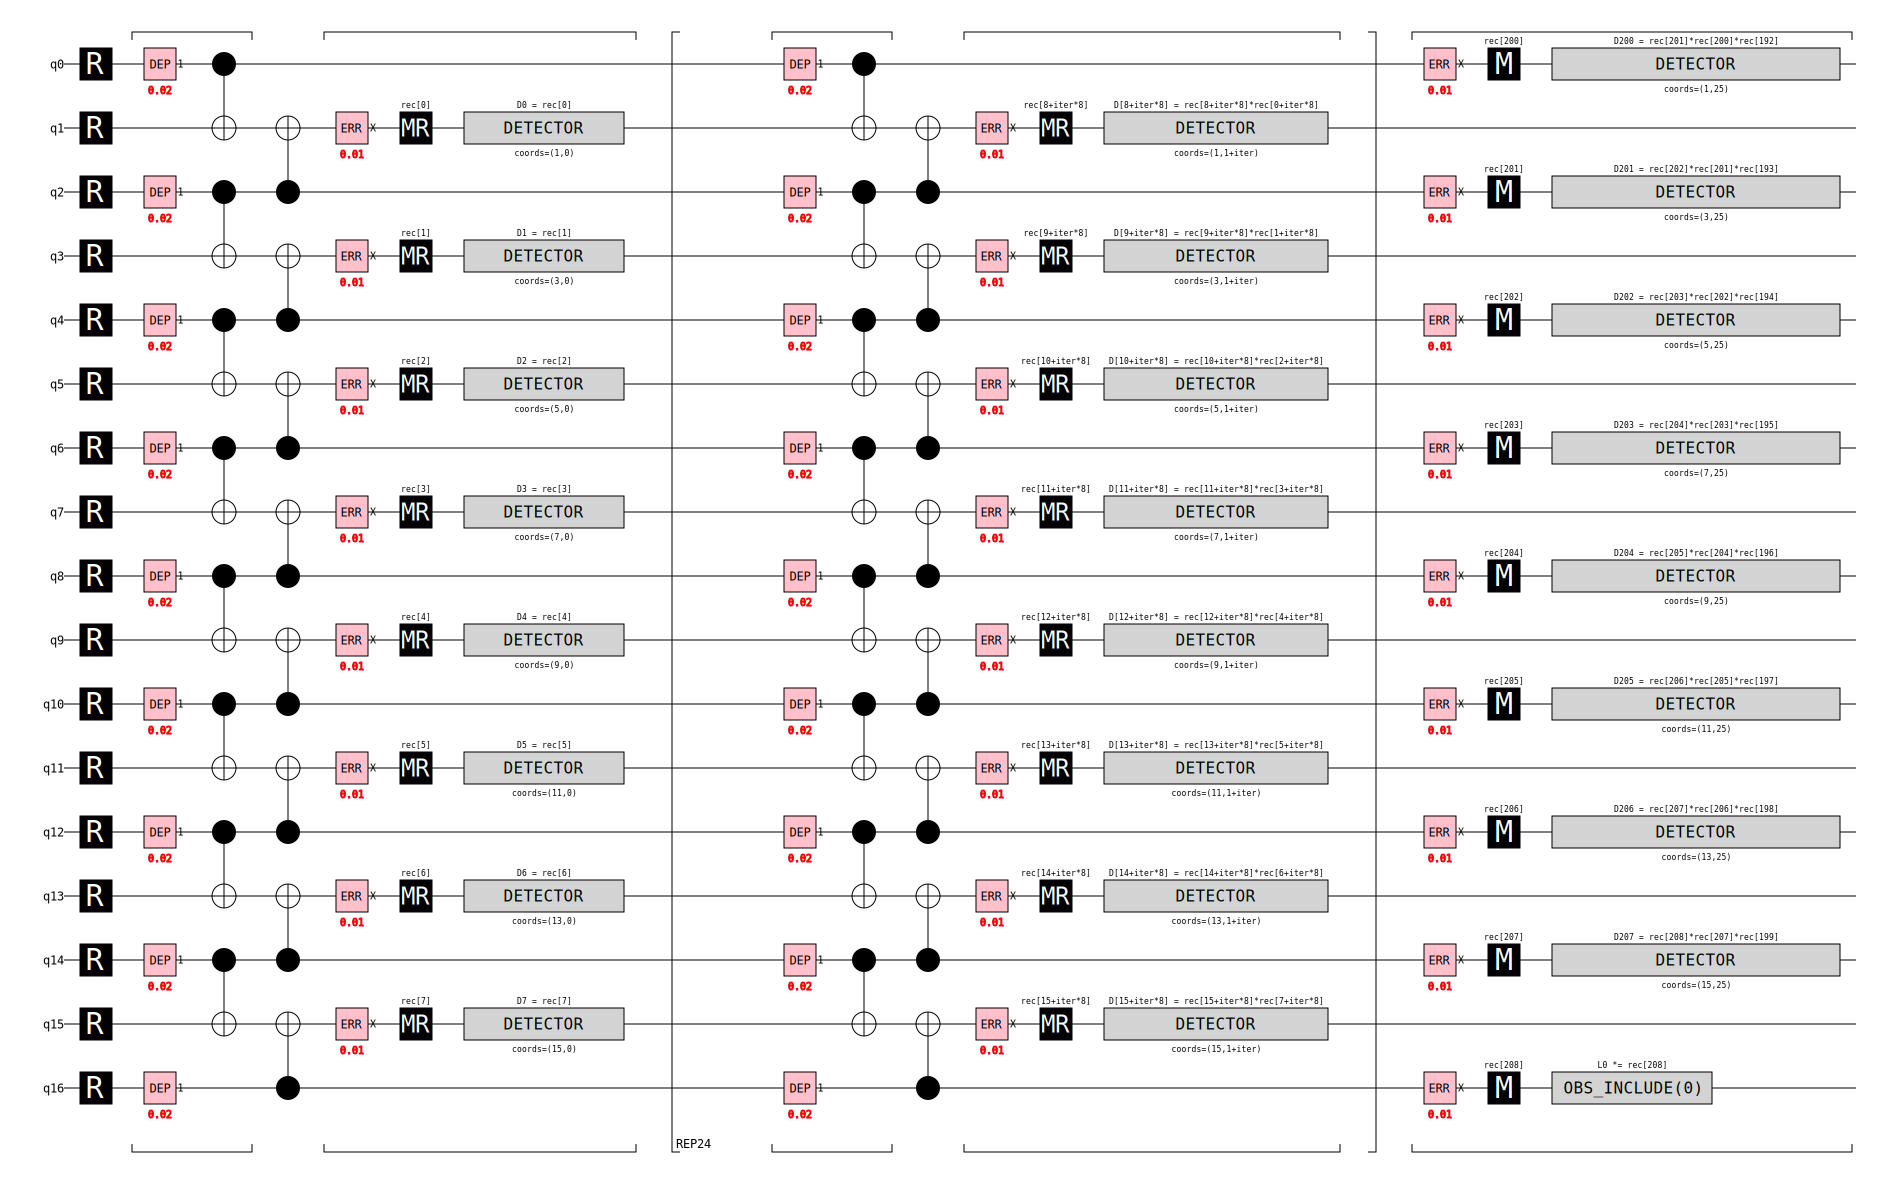

In [87]:
dist=9; rounds=25
circuit = stim.Circuit.generated(
    "repetition_code:memory",
    rounds=rounds,
    distance=dist,
    before_round_data_depolarization=0.02,
    before_measure_flip_probability=0.01)

print(repr(circuit))
circuit.diagram('timeline-svg')

In [88]:
nDet=dist-1
sampler = circuit.compile_sampler()
one_sample = sampler.sample(shots=1)[0]
print('meas: '+' '.join(['%d'%i for i in range(nDet)]))
for k in range(0, len(one_sample), nDet):
    timeslice = one_sample[k:k+nDet]
    j=k//nDet
    print('t %2d: '%j + " ".join("1" if e else "_" for e in timeslice))

meas: 0 1 2 3 4 5 6 7
t  0: _ _ _ _ _ _ _ _
t  1: _ _ _ _ _ _ _ _
t  2: _ _ _ _ _ _ _ _
t  3: _ _ _ _ _ _ _ _
t  4: _ _ _ _ _ _ _ _
t  5: _ _ _ _ _ _ _ _
t  6: _ _ _ _ _ _ _ _
t  7: _ _ _ _ _ _ _ 1
t  8: _ _ _ _ _ _ _ _
t  9: _ _ _ _ _ _ _ _
t 10: _ _ _ _ _ _ _ _
t 11: _ _ _ _ _ _ _ _
t 12: _ _ _ _ _ _ _ _
t 13: _ _ _ _ _ _ _ _
t 14: _ _ _ _ _ _ _ _
t 15: _ _ _ _ _ _ _ _
t 16: _ _ _ _ _ _ _ _
t 17: _ _ _ _ _ _ _ _
t 18: _ _ _ _ _ _ _ _
t 19: _ _ _ _ _ _ _ _
t 20: _ _ _ _ _ _ _ _
t 21: _ _ _ _ _ _ _ _
t 22: _ _ _ _ _ _ _ _
t 23: _ _ _ _ _ _ _ _
t 24: _ _ _ _ _ _ _ _
t 25: _ _ _ _ _ _ _ _
t 26: _


In [89]:
detector_sampler = circuit.compile_detector_sampler()
one_sample = detector_sampler.sample(shots=1)[0]
print('det: '+' '.join(['%d'%i for i in range(nDet)]))
for k in range(0, len(one_sample), nDet):
    timeslice = one_sample[k:k+nDet]
    j=k//nDet
    print('t%2d: '%j + " ".join("!" if e else "_" for e in timeslice))

det: 0 1 2 3 4 5 6 7
t 0: _ _ _ _ _ _ ! !
t 1: _ _ _ _ _ _ _ _
t 2: ! _ _ _ _ _ _ _
t 3: ! _ _ _ _ _ _ _
t 4: _ _ _ _ _ _ _ _
t 5: _ _ _ _ _ _ _ _
t 6: _ _ _ _ _ _ _ _
t 7: _ _ _ _ _ _ _ _
t 8: _ _ _ _ _ _ _ _
t 9: _ _ _ _ _ _ _ _
t10: _ _ _ _ _ _ _ _
t11: _ _ _ _ _ _ _ _
t12: _ _ _ _ _ _ _ _
t13: _ _ _ _ _ _ _ _
t14: _ _ _ _ _ _ _ _
t15: _ _ _ _ _ _ _ _
t16: ! ! _ _ _ _ _ !
t17: _ _ _ _ _ _ _ _
t18: _ _ _ _ _ _ _ _
t19: _ _ _ _ _ _ _ _
t20: _ _ _ _ _ _ _ !
t21: _ _ _ _ _ _ _ _
t22: _ _ _ _ _ _ _ _
t23: _ _ _ _ _ _ _ _
t24: _ _ _ _ _ ! ! _
t25: _ _ _ _ _ _ _ _


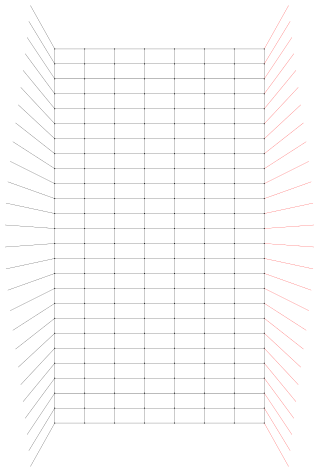

In [90]:
# detectprs error model
dem = circuit.detector_error_model()
dem.diagram("matchgraph-svg")

In [93]:
out12 = detector_sampler.sample(shots=3, separate_observables=True)
print(type(out12), len(out12))
out1,out2=out12
print(f'dist={dist} rounds={rounds}  prod={dist*(rounds-1)} meas={dist-1} out1.shape={out1.shape}')
print(f'out2.shape={out2.shape}')

<class 'tuple'> 2
dist=9 rounds=25  prod=216 meas=8 out1.shape=(3, 208)
out2.shape=(3, 1)


In [106]:
# Pauli strings
xx = stim.PauliString("+X")
zz = stim.PauliString("+YY")

print('Input:',xx,zz)
# Pauli strings can be multiplied
mul_res = xx * zz
print("Multiplication: %s * %s = "%(xx,zz), mul_res)

# Pauli strings can be concatenated
add_res = xx + zz
print("Addition: %s + %s = "%(xx,zz), add_res)


Input: +X +YY
Multiplication: +X * +YY =  +iZY
Addition: +X + +YY =  +XYY


In [109]:
# Define a Tableau simulator
simulator = stim.TableauSimulator()
# Prepare GHZ state
simulator.h(0)
simulator.cx(0, 1)
simulator.cx(0, 2)
simulator.measure_many(0, 1, 2)

[False, False, False]

#### Exercise 2

**(a)** Verify in Stim, that the logical operators map the set of generators to itself and that $X_L$ and $Z_L$ anti-commute.

In [116]:
from stim import PauliString

# must match H-table
steane_stabilizer = [
    stim.PauliString("XXXXIII"),
    stim.PauliString("IXXIXXI"),
    stim.PauliString("IIXXIXX"),  # <- note: NOT "IIIXXXX"
    stim.PauliString("ZZZZIII"),
    stim.PauliString("IZZIZZI"),
    stim.PauliString("IIZZIZZ"),  # <- note: NOT "IIIZZZZ"
]

log_x = PauliString("IIIIXXX")
#log_x = PauliString("XXXXXXX")
log_z = PauliString("IIIIZZZ")

# Conjugate the stabilizers one by one with the logical observables and compare the lists
conj_log_x = [log_x * s * log_x for s in steane_stabilizer]
conj_log_z = [log_z * s * log_z for s in steane_stabilizer]

display(conj_log_x)
print()
for s, cx in zip(steane_stabilizer, conj_log_x):
    print(s, " -> ", cx, " commutes:", log_x.commutes(s))

[stim.PauliString("+XXXX___"),
 stim.PauliString("+_XX_XX_"),
 stim.PauliString("+__XX_XX"),
 stim.PauliString("+ZZZZ___"),
 stim.PauliString("+_ZZ_ZZ_"),
 stim.PauliString("+__ZZ_ZZ")]


+XXXX___  ->  +XXXX___  commutes: True
+_XX_XX_  ->  +_XX_XX_  commutes: True
+__XX_XX  ->  +__XX_XX  commutes: True
+ZZZZ___  ->  +ZZZZ___  commutes: True
+_ZZ_ZZ_  ->  +_ZZ_ZZ_  commutes: True
+__ZZ_ZZ  ->  +__ZZ_ZZ  commutes: True


## What does “conjugate stabilizers with the logical observable” mean?

It means: take each stabilizer operator `S` and transform it by a “logical observable” `L`
(using a **similarity transform**):

\[
S \;$\rigtharrow$; L\,S\,L^\dagger.
\]

This is called **conjugation** of `S` by `L`.

- `S` is typically a stabilizer generator (a Pauli string like `XXXXIII`).
- `L` is typically a logical Pauli observable (like \( \bar X \) or \( \bar Z \)) or a logical gate.

---

## Is it the commutator?

Not exactly.

- The **commutator** is:
  \[
  [L,S] = LS - SL.
  \]

- **Conjugation** is:
  \[
  LSL^\dagger.
  \]

But for **Pauli operators**, conjugation is closely tied to commutation:

### Case 1: `L` commutes with `S`
If \( LS = SL \), then
\[
LSL^\dagger = S.
\]

### Case 2: `L` anticommutes with `S`
If \( LS = -SL \), then
\[
LSL^\dagger = -S.
\]

So for Paulis, conjugation typically results in **the same Pauli string** but maybe with a **sign flip**.

---

## Why is this useful for stabilizer codes?

A valid **logical Pauli observable** should:

1. **Commute with all stabilizers** (so it preserves the codespace), and
2. **Not be a product of stabilizers** (so it acts nontrivially on the encoded qubit).

If `L` is a proper logical Pauli, then for every stabilizer generator `S` you should get:
\[
LSL^\dagger = S
\]
(i.e., it leaves each stabilizer unchanged).

If you see sign flips (`-S`), that means `L` anticommutes with that `S`, so `L` is *not*
a valid logical observable for that stabilizer set.

---

## How to compute this in `stim`



Conjugate the stabilizers with the logical observable” means apply a similarity transform:
$$S \;\mapsto\; L\,S\,L^\dagger$$
where $S$ is a stabilizer generator and $L$ is the “logical observable” (often a logical Pauli like $\bar X$ or $\bar Z$).
Is that the commutator?
Not exactly. The commutator is $[L,S]=LS-SL$.
But conjugation and commutation are tightly related:

If $L$ commutes with $S$ ($LS=SL$), then
$$LSL^\dagger = S.$$

If $L$ anticommutes with $S$ ($LS=-SL$), then
$$LSL^\dagger = -S.$$


So conjugation is a stronger operation; for Pauli operators it basically tells you “commutes (same) or anticommutes (minus sign)”.


In [122]:
import math
import stim

def paulistring_num_qubits(p: stim.PauliString) -> int:
    s = str(p)  # e.g. "+XXIZ", "-IIII", "iXYZ", "-iXX"
    if s.startswith(("+", "-")):
        s = s[1:]
    elif s.startswith("-i"):
        s = s[2:]
    elif s.startswith("i"):
        s = s[1:]
    return len(s)

def generated_group_keys(gens):
    n = paulistring_num_qubits(gens[0])
    I = stim.PauliString("I" * n)
    keys = set()
    m = len(gens)
    for mask in range(1 << m):
        p = I
        for j in range(m):
            if (mask >> j) & 1:
                p = p * gens[j]
        keys.add(str(p))  # store hashable representation
    return keys, n

def verify_stabilizer_generators(gens):
    # 0) same length check
    n0 = paulistring_num_qubits(gens[0])
    if any(paulistring_num_qubits(g) != n0 for g in gens):
        raise ValueError("Generators have differing lengths.")
    m = len(gens)

    # 1) pairwise commutation
    for i in range(m):
        for j in range(i + 1, m):
            if not gens[i].commutes(gens[j]):
                print("FAIL: generators do not commute:")
                print(f"  g[{i}] = {gens[i]}")
                print(f"  g[{j}] = {gens[j]}")
                return False

    # 2) generate the group and check -I is not present
    keys, n = generated_group_keys(gens)
    minus_I_key = "-" + "I" * n
    if minus_I_key in keys:
        print("FAIL: generated group contains -I (codespace would be empty).")
        return False

    # 3) check independence (optional but nice)
    expected = 1 << m
    if len(keys) == expected:
        print(f"OK: commuting, no -I, independent. |S| = {len(keys)} = 2^{m}")
    else:
        print(f"WARNING: commuting and no -I, but generators are not independent.")
        print(f"  |S| = {len(keys)} but expected 2^{m} = {expected}")

    # 4) implied number of logical qubits (k = n - rank), where rank = log2(|S|)
    rank = int(round(math.log2(len(keys))))
    k = n - rank
    print(f"Implied: n={n}, rank≈{rank}, so k=n-rank={k}.")
    return True


# Correct Steane generators (commuting)
steane_stabilizer = [
    stim.PauliString("XXXXIII"),
    stim.PauliString("IXXIXXI"),
    stim.PauliString("IIXXIXX"),
    stim.PauliString("ZZZZIII"),
    stim.PauliString("IZZIZZI"),
    stim.PauliString("IIZZIZZ"),
]

verify_stabilizer_generators(steane_stabilizer)

OK: commuting, no -I, independent. |S| = 64 = 2^6
Implied: n=7, rank≈6, so k=n-rank=1.


True

To solve part (b), use the fact that logical observables are defined only up to multiplication by stabilizers:
$$L \sim L' \quad\Longleftrightarrow\quad \exists\, S\in \mathcal S \text{ such that } L' = L\,S$$
because for any code state $|\psi\rangle$ stabilized by every $S\in\mathcal S$,
$$(L S)|\psi\rangle = L(S|\psi\rangle)=L|\psi\rangle.$$
So the “equivalence class” of a logical operator $L$ is simply:
$$\{\, L S : S\in \mathcal S \,\}.$$
Below is a Stim-based way to generate the stabilizer group from generators, then list all equivalent logical observables.

In [127]:
log_x = PauliString("IIIIXXX")
#log_x = PauliString("XXXXXXX")
print('my X_L:',log_x)
for s in steane_stabilizer:
    print(s)
eq_logx = [log_x * s  for s in steane_stabilizer]
display(eq_logx)


my X_L: +____XXX
+XXXX___
+_XX_XX_
+__XX_XX
+ZZZZ___
+_ZZ_ZZ_
+__ZZ_ZZ


[stim.PauliString("+XXXXXXX"),
 stim.PauliString("+_XX___X"),
 stim.PauliString("+__XXX__"),
 stim.PauliString("+ZZZZXXX"),
 stim.PauliString("-_ZZ_YYX"),
 stim.PauliString("-__ZZXYY")]

In [129]:
#How to generate the full equivalence class in Stim (polyfill-safe), it should have 2^6=64 elements
import stim

def strip_phase(s: str) -> str:
    if s.startswith(("+", "-")):
        return s[1:]
    if s.startswith("-i"):
        return s[2:]
    if s.startswith("i"):
        return s[1:]
    return s

def stabilizer_group_from_generators(gens):
    n = len(strip_phase(str(gens[0])))
    I = stim.PauliString("I" * n)
    group = []
    m = len(gens)
    for mask in range(1 << m):
        p = I
        for j in range(m):
            if (mask >> j) & 1:
                p = p * gens[j]
        group.append(p)
    return group

stab_group = stabilizer_group_from_generators(steane_stabilizer)
eq_class = {str(log_x * s) for s in stab_group}
print("number of equivalent reps:", len(eq_class))

number of equivalent reps: 64


In [132]:
eq_class

{'+XXXXXXX',
 '+XXYYXYY',
 '+XXZZXZZ',
 '+XX__X__',
 '+XYXYYXY',
 '+XYYXYYX',
 '+XZXZZXZ',
 '+XZZXZZX',
 '+X_X__X_',
 '+X__X__X',
 '+YXXYYYX',
 '+YXYXYXY',
 '+YYXXXYY',
 '+YYYYXXX',
 '+ZXXZZZX',
 '+ZXZXZXZ',
 '+ZZXXXZZ',
 '+ZZZZXXX',
 '+_XX___X',
 '+_X_X_X_',
 '+__XXX__',
 '+____XXX',
 '-XYZ_YZ_',
 '-XY_ZY_Z',
 '-XZY_ZY_',
 '-XZ_YZ_Y',
 '-X_YZ_YZ',
 '-X_ZY_ZY',
 '-YXZ_Y_Z',
 '-YX_ZYZ_',
 '-YYZZX__',
 '-YY__XZZ',
 '-YZX__YZ',
 '-YZYZ_X_',
 '-YZZY__X',
 '-YZ_X_ZY',
 '-Y_XZZY_',
 '-Y_Y_ZXZ',
 '-Y_ZXZ_Y',
 '-Y__YZZX',
 '-ZXY_Z_Y',
 '-ZX_YZY_',
 '-ZYX__ZY',
 '-ZYYZ__X',
 '-ZYZY_X_',
 '-ZY_X_YZ',
 '-ZZYYX__',
 '-ZZ__XYY',
 '-Z_XYYZ_',
 '-Z_YXY_Z',
 '-Z_Z_YXY',
 '-Z__ZYYX',
 '-_XYZ_ZY',
 '-_XZY_YZ',
 '-_YXZZ_Y',
 '-_YY_ZZX',
 '-_YZXZY_',
 '-_Y_YZXZ',
 '-_ZXYY_Z',
 '-_ZYXYZ_',
 '-_ZZ_YYX',
 '-_Z_ZYXY',
 '-__YYXZZ',
 '-__ZZXYY'}

Yes — if those 64 strings were generated as
$$\{\, X_L \cdot s \;:\; s \in \mathcal S \,\},$$
i.e. by multiplying one valid logical-$X$ representative by every stabilizer $s$ in the stabilizer group $\mathcal S$, then every string in that set is an equivalent representative of the same logical operator $X_L$ (same action on the codespace).
Why that’s true
For any code state $|\psi\rangle$ and any stabilizer $s\in\mathcal S$, we have $s|\psi\rangle=|\psi\rangle$. Therefore
$$(X_L s)|\psi\rangle = X_L (s|\psi\rangle)=X_L|\psi\rangle.$$
So $X_L$ and $X_L s$ are physically indistinguishable on encoded states.
That’s exactly what “equivalence class modulo stabilizers” means.
What about strings containing Y or Z?
Those can still be valid representatives of logical $X_L$. They look different because multiplying by Z-type stabilizers can turn some X’s into Y’s (since $XZ \propto Y$ up to phase). Despite that, on the codespace they implement the same logical operation.


###To show $H_L := H^{\otimes 7}$ is a logical operator for the Steane $[[7,1,3]]$ CSS code, you do two things:

1) Show it preserves the codespace (i.e., it normalizes the stabilizer).
2) Read off what logical gate it implements from how it conjugates $X_L$ and $Z_L$.



### 1) Verify $H^{\otimes 7}$ is a logical operator (preserves the code)
Let $S$ be the Steane stabilizer group. As a CSS code, it has generators of the form

$X$-type: $g^X = \bigotimes_{j=1}^7 X_j^{a_j}$
$Z$-type: $g^Z = \bigotimes_{j=1}^7 Z_j^{a_j}$

with the same binary patterns $(a_1,\dots,a_7)$ coming from the Hamming parity-check matrix (this “same patterns for X and Z” is the Steane code’s self-duality feature).
Now use the single-qubit identities
$$H X H = Z,\qquad H Z H = X.$$
Therefore for any $X$-type stabilizer generator $g^X$,
$$H^{\otimes 7}\, g^X \,(H^{\otimes 7})^\dagger
= \bigotimes_{j=1}^7 (H X_j^{a_j} H) 
= \bigotimes_{j=1}^7 Z_j^{a_j}
= g^Z,$$
which is a $Z$-type stabilizer with the same support, hence still in $S$.
Similarly, any $Z$-type generator is mapped to the corresponding $X$-type generator:
$$H^{\otimes 7}\, g^Z \,(H^{\otimes 7})^\dagger = g^X \in S.$$
So overall,
$$H^{\otimes 7} S (H^{\otimes 7})^\dagger = S,$$
meaning $H^{\otimes 7}$ maps the codespace to itself. That is exactly what it means for $H^{\otimes 7}$ to be a valid logical operation.

### 2) Show it acts as a logical Hadamard from its action on $X_L$ and $Z_L$
Take the standard Steane logical Paulis (one common choice) as
$$X_L = X^{\otimes 7},\qquad Z_L = Z^{\otimes 7}.$$
Conjugate them by $H^{\otimes 7}$:
$$H^{\otimes 7} X_L (H^{\otimes 7})^\dagger
= (H X H)^{\otimes 7}
= Z^{\otimes 7}
= Z_L,$$
and
$$H^{\otimes 7} Z_L (H^{\otimes 7})^\dagger
= (H Z H)^{\otimes 7}
= X^{\otimes 7}
= X_L.$$
So $H^{\otimes 7}$ swaps the logical $X$ and $Z$:
$$X_L \mapsto Z_L,\qquad Z_L \mapsto X_L.$$
But that is exactly the defining action of a (logical) Hadamard gate, since on a single qubit
$$H X H = Z,\quad H Z H = X.$$
Hence $H_L = H^{\otimes 7}$ implements the logical Hadamard on the encoded qubit.


### Check the Steane stabilizer generators on $|0000000\rangle$ (Stim)

You can have Stim tell you whether a Pauli stabilizer $S$ stabilizes $|0^{\otimes 7}\rangle$ by computing the expectation value
$$\langle 0^{\otimes 7} | S | 0^{\otimes 7}\rangle.$$
If it’s $+1$, the state is a +1 eigenstate (stabilized). If it’s $0$, the state is not an eigenstate (so it’s not stabilized).
For $|0\cdots 0\rangle$: any Pauli containing an $X$ or $Y$ on any qubit will give expectation $0$. Pure-$Z$ Paulis give $\pm 1$ (and for Steane stabilizers it’ll be $+1$).
Below is a concrete Stim/Python way to do it.

This is a common Steane generator set (3 X-type + 3 Z-type):

$X$-type: supports $\{0,1,2,4\}$, $\{0,1,3,5\}$, $\{0,2,3,6\}$
$Z$-type: same supports with $Z$ instead of $X$

In [135]:
import stim

sim = stim.TableauSimulator()
sim.reset(7)  # prepares |0000000>
#sim.do(stim.Circuit("X 0 1 2 3 4 5 6"))   # -> |1111111>
sim.do(stim.Circuit("H 0 1 2 3 4 5 6"))   # -> |+++++++>
gens = [
    stim.PauliString("XXXIXII"),  # X0 X1 X2 X4
    stim.PauliString("XXIXIXI"),  # X0 X1 X3 X5
    stim.PauliString("XIXXIIX"),  # X0 X2 X3 X6
    stim.PauliString("ZZZIZII"),  # Z0 Z1 Z2 Z4
    stim.PauliString("ZZIZIZI"),  # Z0 Z1 Z3 Z5
    stim.PauliString("ZIZZIIZ"),  # Z0 Z2 Z3 Z6
]

for g in gens:
    e = sim.peek_observable_expectation(g)
    print(str(g), " expectation on |0^7> =", e)

+XXX_X__  expectation on |0^7> = 1
+XX_X_X_  expectation on |0^7> = 1
+X_XX__X  expectation on |0^7> = 1
+ZZZ_Z__  expectation on |0^7> = 0
+ZZ_Z_Z_  expectation on |0^7> = 0
+Z_ZZ__Z  expectation on |0^7> = 0


### How many entangling gates are needed to measure all stabilizers of the Steane code naively in sequence?
For the $[[7,1,3]]$ Steane code you normally measure the 6 independent stabilizer generators (3 $X$-type and 3 $Z$-type), not every element of the stabilizer group.
In the usual Steane generator set, each generator has weight 4 (acts nontrivially on 4 of the 7 data qubits). A “naive” ancilla-based measurement of a weight-$w$ Pauli stabilizer uses:

$w$ entangling gates (typically $w$ CNOTs) between the ancilla and the $w$ data qubits,
plus single-qubit gates (e.g., an $H$ to switch between $X$- and $Z$-basis), which are not entangling.

So the total number of entangling gates is
$$\sum_{\text{6 generators}} w = 6 \times 4 = 24.$$
Answer: 24 entangling (two-qubit) gates (CNOTs) when measuring the 6 Steane stabilizer generators sequentially in the naive way.

Interpreting measurement bits
If the ancilla measurement result is m (0 or 1), the stabilizer eigenvalue is:
$$s = (-1)^m \in \{+1,-1\}.$$

In [137]:
c = stim.Circuit("""
# Steane [[7,1,3]] naive stabilizer measurement
# data: 0..6
# ancilla: 7

# --- Z stabilizers (data -> ancilla, measure ancilla in Z) ---

R 7
CX 0 7
CX 1 7
CX 2 7
CX 4 7
M 7   # measures S^Z_1 = Z0 Z1 Z2 Z4

R 7
CX 0 7
CX 1 7
CX 3 7
CX 5 7
M 7   # measures S^Z_2 = Z0 Z1 Z3 Z5

R 7
CX 0 7
CX 2 7
CX 3 7
CX 6 7
M 7   # measures S^Z_3 = Z0 Z2 Z3 Z6


# --- X stabilizers (ancilla -> data, measure ancilla in X) ---

R 7
H 7
CX 7 0
CX 7 1
CX 7 2
CX 7 4
H 7
M 7   # measures S^X_1 = X0 X1 X2 X4

R 7
H 7
CX 7 0
CX 7 1
CX 7 3
CX 7 5
H 7
M 7   # measures S^X_2 = X0 X1 X3 X5

R 7
H 7
CX 7 0
CX 7 2
CX 7 3
CX 7 6
H 7
M 7   # measures S^X_3 = X0 X2 X3 X6
""")
print(c)

R 7
CX 0 7 1 7 2 7 4 7
M 7
R 7
CX 0 7 1 7 3 7 5 7
M 7
R 7
CX 0 7 2 7 3 7 6 7
M 7
R 7
H 7
CX 7 0 7 1 7 2 7 4
H 7
M 7
R 7
H 7
CX 7 0 7 1 7 3 7 5
H 7
M 7
R 7
H 7
CX 7 0 7 2 7 3 7 6
H 7
M 7


In [166]:
def encoding_circuit(log_qb_idx: int = 0) -> stim.Circuit:
    """Encoding scheme proposed by Goto 2015:
        https://www.nature.com/articles/srep19578

    To prepare the logical Steane qubit in state |0>_L.
    The qubit index allows shifting the indices so that
    we can prepare multiple logical qubits.
    """
    c = stim.Circuit()
    # shift registers to target logical qubit with given index
    s = log_qb_idx * 8

    c.append("H", [s, 4 + s, 6 + s])
    c.append("CNOT", [s, 1 + s])
    c.append("CNOT", [4 + s, 5 + s])
    c.append("CNOT", [6 + s, 3 + s])
    c.append("CNOT", [6 + s, 5 + s])
    c.append("CNOT", [4 + s, 2 + s])
    c.append("CNOT", [0 + s, 3 + s])
    c.append("CNOT", [4 + s, 1 + s])
    c.append("CNOT", [3 + s, 2 + s])

    # Entangle with ancilla qubit and measure logical Pauli-Z
    c.append("CNOT", [1 + s, 7 + s])
    c.append("CNOT", [3 + s, 7 + s])
    c.append("CNOT", [5 + s, 7 + s])
    #c.append("X", [7])
    c.append("M", [7 + s])

    return c

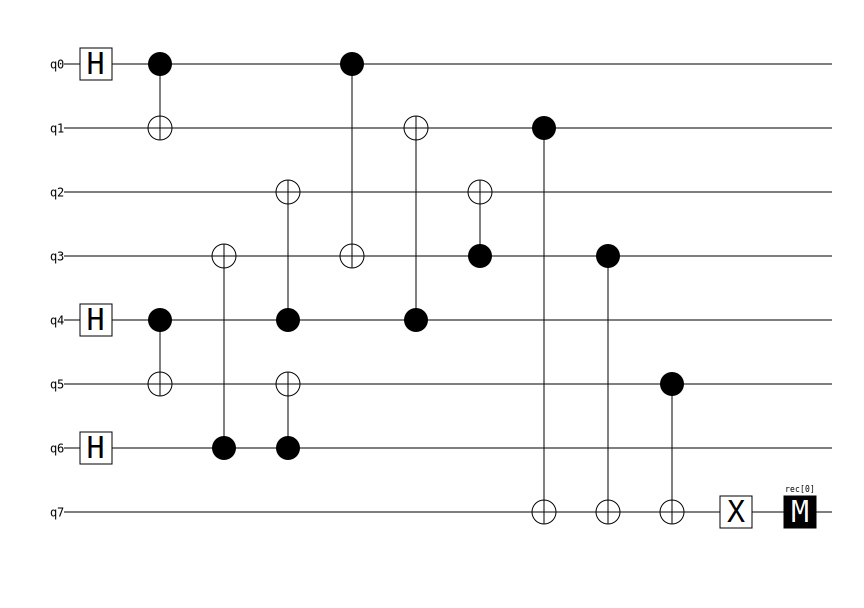

In [161]:
c = stim.Circuit()
c += encoding_circuit()
# Apply Logical X (X_L) to flip |0>_L to |1>_L
#c.append("X", [0, 1, 2, 3, 4, 5, 6])
#c.append("H", [0, 1, 2, 3, 4, 5, 6])
# ----------------------
c.diagram("timeline-svg")

### Explain meaing of defining circuit via stabilizers

This is the critical conceptual jump to understanding Error Correction.In Qiskit (Schrödinger picture), you track the Statevector ($\psi$).In Stim (Heisenberg picture), you track the Stabilizers (the operators that leave $\psi$ unchanged).

When you run that code, you aren't calculating probabilities. You are calculating the mathematical definition of the state your circuit created. Here is exactly what you are seeing and why it matters.

1. The Core Concept: "Defining by Constraints"Think of the state $|00\dots0\rangle$.Qiskit way: It's a vector [1, 0, 0, ...].Stim way: It is the unique state that answers "+1" if you measure $Z_0$, $Z_1$, $Z_2$, etc.$Z_0 |00\dots0\rangle = (+1)|00\dots0\rangle$$Z_1 |00\dots0\rangle = (+1)|00\dots0\rangle$We say the "Stabilizers" of the input state are $\{Z_0, Z_1, \dots, Z_n\}$.
  
2. What the Transformation DoesWhen you apply a gate (like H or CNOT), Stim doesn't update a vector. It updates the list of Stabilizers.Apply H on qubit 0: The stabilizer $Z_0$ transforms into $X_0$.(Because if you flip $|0\rangle$ to $|+\rangle$, it is now stabilized by $X$, not $Z$.)Apply CNOT 0→1:$X_0$ becomes $X_0 X_1$ (Logic spreads forward).$Z_1$ becomes $Z_0 Z_1$ (Phase kicks back).

3. Interpreting Your OutputWhen you call t.to_stabilizers(), Stim prints the final list of rules that your state obeys. For the Steane code preparing $|0\rangle_L$, you are looking for specific rows.

In [162]:
t = c.to_tableau(ignore_measurement=True)
print("Stabilizers")
t.to_stabilizers()

Stabilizers


[stim.PauliString("+XXXX____"),
 stim.PauliString("+ZZ__Z___"),
 stim.PauliString("+__ZZZ___"),
 stim.PauliString("+Z__Z__Z_"),
 stim.PauliString("+_XX_XX__"),
 stim.PauliString("+____ZZZ_"),
 stim.PauliString("+__XX_XX_"),
 stim.PauliString("-_Z_Z_Z_Z")]

You are seeing the **"DNA"** of your quantum state.

When you ask Stim for stabilizers, it gives you the **set of rules** that your state currently obeys. This list completely defines the state  (entangled with the ancilla).

Here is how to decode that output:

### 1. The "Flag" (Ancilla Entanglement)

Look at the last row:
`stim.PauliString("+_Z_Z_Z_Z")`

* **Translation:** 
* **Indices:** 01234567 (The underscore `_` means Identity on that qubit).
* **Meaning:** This says, "The Z-value of the ancilla (Qubit 7) is exactly equal to the parity of Data Qubits 1, 3, and 5."
* **Why it matters:** This confirms your verification logic worked! You successfully entangled the ancilla with the specific subset of qubits you wanted to check. If you were to measure Qubit 7 now, it would collapse this entanglement and tell you that parity.

### 2. The Code Stabilizers (The Generators)

The other rows define the Steane code itself. Stim outputs a **Generator Set**—a minimal list of rules that imply all other rules. They might look different from the "textbook" symmetric stabilizers because Stim simplifies them, but they describe the same mathematical object.

For example, look at the **X-type** rows (which define the "Code Space" and protect against Z errors):

* `+XXXX____`: 
* `+_XX_XX__`: 
* `+__XX_XX_`: 

These look like the parity checks of a Classical Hamming Code. They enforce that the state lies in the correct subspace.

### 3. The Logical State (The "Zero-ness")

How do you know this is  and not ?

* **** is an eigenstate of logical  with eigenvalue .
* **** is an eigenstate of logical  with eigenvalue .

You don't see a single row saying `ZZZZZZZ_` (the logical operator), but it is **implied** by the combination of the Z-stabilizers listed:

* `+ZZ__Z___`
* `+__ZZZ___`
* `+____ZZZ_`
* ...and others.

If you multiply these rows together (using group theory math), you will generate the Logical  operator. The fact that all these Z-rows have a **`+`** sign at the front confirms you prepared the **Logical Zero** state. If you had applied a logical bit-flip (), some of these signs (or their product) would have flipped to negative.

### Summary

You are learning that:

1. **Entanglement Exists:** The ancilla (bit 7) is correctly "hooked" into the data.
2. **The State is Pure:** You have 8 independent stabilizers for 8 qubits. This means the state is fully defined (entropy is 0).
3. **The Basis is Correct:** The specific pattern of X's and Z's confirms you have created the Steane code structure, not just random entanglement.

### sampling from circuit

As a final sanity check, we can sample shots from the circuit and measure $Z_L$. In the absence of noise, we should prepare the state $|0\rangle_L$ with 100% success rate.

To avoid code repetition, let's first define a method that takes a circuit, samples from it, and returns the measurements

#### Exercise 3

Given the helper function below, complete the circuit  to correctly compute the logical $Z_L$ measurement result given the measurements of the physical qubits. 

In [149]:
import numpy as np
def measure_logical_qubits(log_qubit_indices: list[int] = [0]) -> stim.Circuit:
    c = stim.Circuit()
    for log_qubit_index in log_qubit_indices:
        # shift index
        s = log_qubit_index * 8
        # final measurement
        c.append("M", np.array([0, 1, 2, 3, 4, 5, 6]) + s)
    return c

def sample_from_circuit(c: stim.Circuit, shots: int = 10) -> np.array:
    # compile a sampler and sample 10 shots
    s = c.compile_sampler()
    r = s.sample(shots=shots).astype(int)

    return r

In [167]:
c = stim.Circuit()
# prepare |0>_L
c += encoding_circuit()
# append final measurement
c += measure_logical_qubits()
# sample from circuit
r = sample_from_circuit(c, shots=10)
print(r,r.shape)
# compute Z_L observable from measurement
#logical_measurement_output = None  # TODO

[[0 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 0 1]
 [0 1 1 1 1 0 0 0]
 [0 1 1 1 1 0 0 0]
 [0 0 1 1 0 1 1 0]
 [0 1 0 1 0 1 0 1]
 [0 1 1 0 0 0 1 1]
 [0 0 1 0 1 1 0 1]
 [0 1 1 1 1 0 0 0]
 [0 0 0 1 1 0 1 1]] (10, 8)


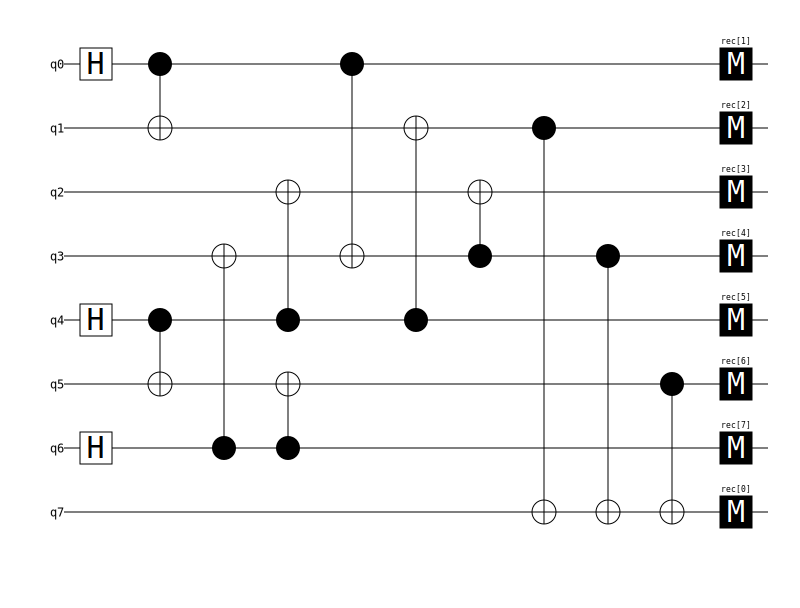

In [168]:
c.diagram("timeline-svg")

Based on the code structure you provided earlier, the order of bits in the result `r` is **Chronological** (the order in which `M` instructions appear in the circuit).

Here is the breakdown of your result array `r`:

### **The Output Format: `[Ancilla, Data0, Data1, ..., Data6]**`

Your result array `r` will have the shape **`(10, 8)`** (10 shots, 8 measured bits).

| Bit Index in `r` | Origin | Qubit Index | Meaning |
| --- | --- | --- | --- |
| **0** | `encoding_circuit` | **7** (Ancilla) | **Verification Flag.**<br>

<br>0 = Valid State<br>

<br>1 = Hook Error Detected (Reject) |
| **1** | `measure_logical_qubits` | **0** | Data Qubit 0 (Readout) |
| **2** | `measure_logical_qubits` | **1** | Data Qubit 1 (Readout) |
| **3** | `measure_logical_qubits` | **2** | Data Qubit 2 (Readout) |
| **4** | `measure_logical_qubits` | **3** | Data Qubit 3 (Readout) |
| **5** | `measure_logical_qubits` | **4** | Data Qubit 4 (Readout) |
| **6** | `measure_logical_qubits` | **5** | Data Qubit 5 (Readout) |
| **7** | `measure_logical_qubits` | **6** | Data Qubit 6 (Readout) |

### **Why this order?**

Stim (and quantum hardware generally) appends measurement results to a classic register in a **First-In, First-Out (FIFO)** manner.

1. **First Measurement:** Inside `encoding_circuit()`, you explicitly called:
```python
c.append("M", [7 + s])  # This becomes Bit 0

```


2. **Subsequent Measurements:** Inside `measure_logical_qubits()`, you likely call something like:
```python
c.append("M", [0, 1, 2, 3, 4, 5, 6]) # These become Bits 1 through 7

```

In [169]:
# Separate the Flag from the Data
flags = r[:, 0]        # Shape (10,)
data  = r[:, 1:]       # Shape (10, 7)

# 1. Filter: Keep only shots where Flag == 0 (Ancilla is 0)
valid_indices = (flags == 0)
clean_data = data[valid_indices]

print(f"Kept {len(clean_data)} valid shots out of {len(r)}")

# 2. Decode: Calculate Logical Value from clean_data (Parity of weight-7)
# For Steane code Z-basis readout:
# Logical_Z = Parity of all 7 bits (sum modulo 2)
logical_values = np.sum(clean_data, axis=1) % 2

print("Logical Values:", logical_values)

Kept 10 valid shots out of 10
Logical Values: [0 0 0 0 0 0 0 0 0 0]


### Different Basis State Preparation

We can prepare the state $| 0 \rangle_L$ with the method above. Next, we'll want to prepare the logical qubit in different basis states

$$ \{ |0\rangle_L, |1\rangle_L, |+\rangle_L, |-\rangle_L, |+i\rangle_L, |-i\rangle_L \} $$

This can easily be done by using the logical gates $X_L, Z_L, S_L$, and $H_L$, that we identified in the previous section.

In [170]:
def logical_single_qubit_gate(gate: str, log_qb_idx: int = 0) -> stim.Circuit:
    """
    Supported logical gates:
        - "Z": Logical Z gate
        - "X": Logical X gate
        - "H": Logical Hadamard gate
        - "S": Logical S (phase) gate

    Args:
        c (stim.Circuit): The stim object to append the logical gate to
        gate (str): The name of the logical gate to apply.
                    Must be one of: "Z", "X", "H", "S"
        log_qb_idx (int, optional): Index of the logical qubit to operate on.
                                    Used to offset the physical qubit indices
                                    when working with multiple logical qubits.
                                    Defaults to 0.
                                    Each logical qubit uses 8 physical qubits
                                    (7 data + 1 ancilla).

    Returns:
        stim.Circuit: The modified circuit with the logical gate appended
    """
    c = stim.Circuit()
    # shift registers to target logical qubit with given index
    s = log_qb_idx * 8

    match gate:
        case "Z":
            c.append("Z", np.array([0, 1, 2, 3, 4, 5, 6]) + s)
        case "X":
            c.append("X", np.array([0, 1, 2, 3, 4, 5, 6]) + s)
        case "H":
            c.append("H", np.array([0, 1, 2, 3, 4, 5, 6]) + s)
        case "S":
            c.append("S", np.array([0, 1, 2, 3, 4, 5, 6]) + s)
        case "S_DAG":
            c.append("S_DAG", np.array([0, 1, 2, 3, 4, 5, 6]) + s)
        case _:
            raise ValueError("Logical gate name '{logical_gate}' undefined")

    return c

In [172]:
# We define a helper function to prepare the logical qubit in the Eigenstate of a given Stabilizer
# applies a sequence of Logical Gates to transform it into one of the 6 cardinal states on the Bloch sphere.
def prepare_stab_eigenstate(stabilizer: str) -> stim.Circuit:
    """Generates a circuit preparing the Eigenstate of a given singe-qubit stabilizer"""

    c = stim.Circuit()

    match stabilizer:
        case "+Z":  # |0>
            pass
        case "-Z":  # |1>
            c += logical_single_qubit_gate(gate="X")
        case "+X":  # |+>
            c += logical_single_qubit_gate(gate="H")
        case "-X":  # |->
            c += logical_single_qubit_gate(gate="X")
            c += logical_single_qubit_gate(gate="H")
        case "+Y":  # |+i>
            c += logical_single_qubit_gate(gate="H")
            c += logical_single_qubit_gate(gate="S")
        case "-Y":  # |-i>
            c += logical_single_qubit_gate(gate="X")
            c += logical_single_qubit_gate(gate="H")
            c += logical_single_qubit_gate(gate="S")
        case _:
            raise ValueError(f"Unknown stabilizer {stabilizer}")

    return c

In [182]:
#Let's test the state preparation for our logical qubit when measuring in the $Z_L$ basis
c = stim.Circuit()
# prepare |0>_L
c += encoding_circuit()
# apply a bit-flip
c += logical_single_qubit_gate(gate="X")
# append final measurement
c += measure_logical_qubits()
# sample from circuit
r = sample_from_circuit(c, shots=10)

logical_measurement_output = r[:, 5] ^ r[:, 6] ^ r[:, 7] # it is not FT-decoding
print("Logical bit-flip measurement outcome: ", logical_measurement_output)

Logical bit-flip measurement outcome:  [1 1 1 1 1 1 1 1 1 1]


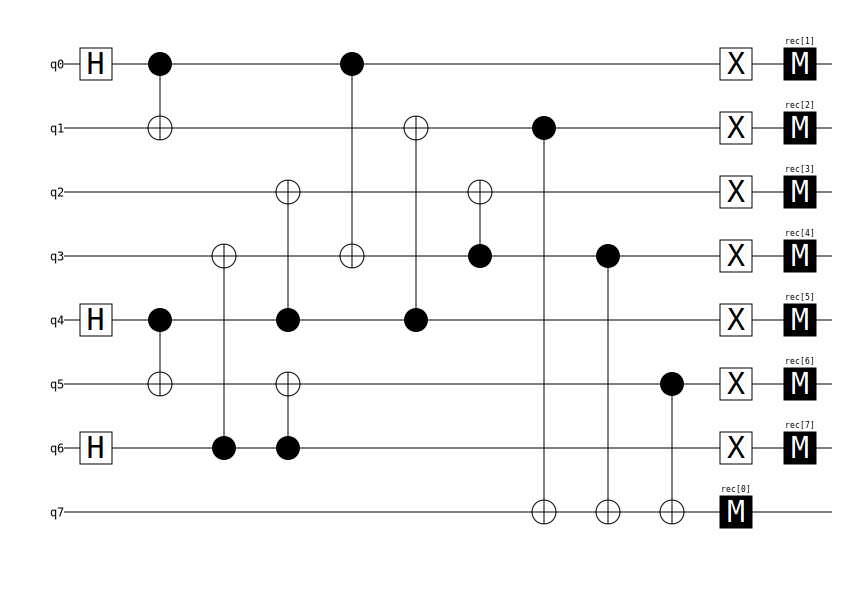

In [183]:
c.diagram("timeline-svg")

In [179]:
c = stim.Circuit()
# prepare |0>_L
c += encoding_circuit()
# apply a logical X by using logical HZH construction
c += logical_single_qubit_gate(gate="H")
c += logical_single_qubit_gate(gate="Z")
c += logical_single_qubit_gate(gate="H")
# append final measurement
c += measure_logical_qubits()
# sample from circuit
r = sample_from_circuit(c, shots=20)

# compute Z_L observable from measurement
logical_measurement_output = r[:, 5] ^ r[:, 6] ^ r[:, 7]
print("Logical bit-flip measurement outcome: ", logical_measurement_output)

Logical bit-flip measurement outcome:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


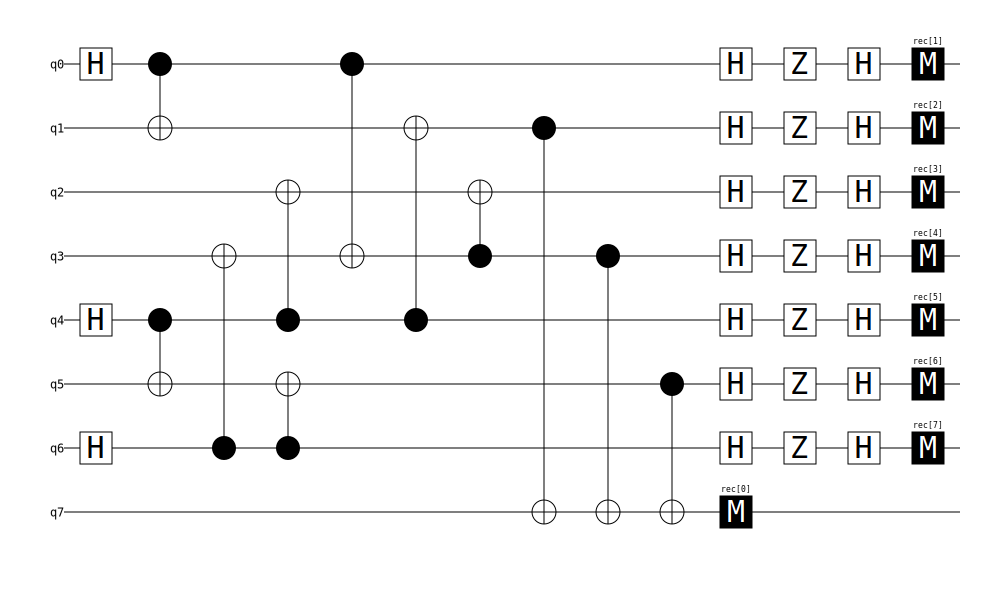

In [180]:
c.diagram("timeline-svg")

### Measuring in different Basis

To measure a qubit in a different basis we usually apply single-qubit rotations before the measurement in the $Z$-basis. 

For example, if we want to measure in the $X$-basis we need to apply a Hadamard gate before the measurement since

$$\langle \psi | H Z H | \psi \rangle = \langle \psi | X | \psi \rangle $$

In [184]:
def rotate_to_measurement_basis(meas_basis: str) -> stim.Circuit:
    """Appends single-qubit rotations to a circuit to prepare
    measurement in specified basis"""
    c = stim.Circuit()

    match meas_basis:
        case "Z":
            pass
        case "X":
            c += logical_single_qubit_gate(gate="H")
        case "Y":
            c += logical_single_qubit_gate(gate="S_DAG")
            c += logical_single_qubit_gate(gate="H")
        case _:
            raise ValueError("Specified target basis not known")

    return c

In [185]:
c = stim.Circuit()
# prepare |0>_L
c += encoding_circuit()
# rotate to X-basis
c += rotate_to_measurement_basis(meas_basis="X")
# append final measurement
c += measure_logical_qubits()
# sample from circuit
r = sample_from_circuit(c, shots=10)

# compute Z_L observable from measurement
logical_measurement_output = r[:, 5] ^ r[:, 6] ^ r[:, 7]
print("Logical bit-flip measurement outcome: ", logical_measurement_output)

Logical bit-flip measurement outcome:  [0 1 0 0 1 1 0 1 0 0]


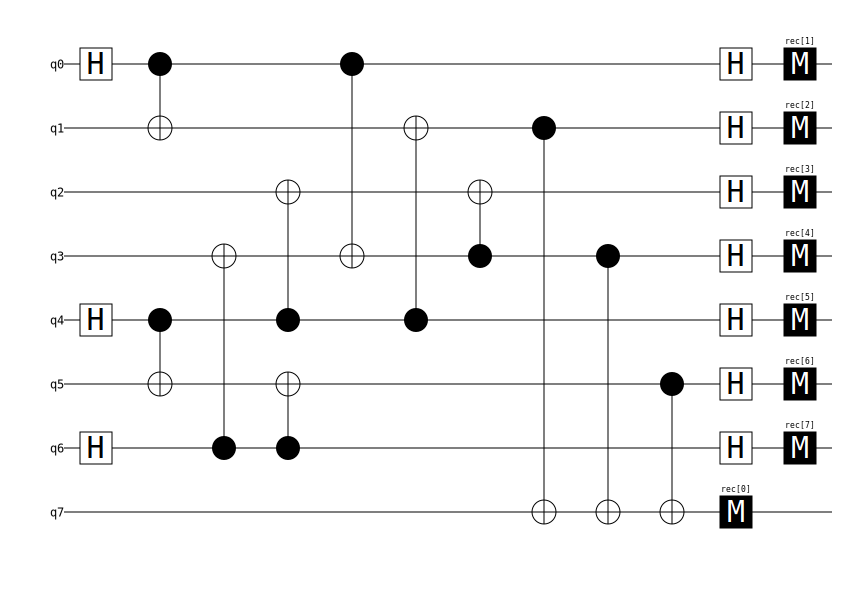

In [186]:
c.diagram("timeline-svg")

### Transversal gates

We have now a good understanding of how to manipulate a single logical qubit. To leverage quantum advantage in the future, we will also need to be able to entangle our logical qubits. 

In this section we are going to implement a logical CNOT gate. Then, we'll put everything together to prepare a logical GHZ state using 14 + 2 physical qubits:
$$\ket{GHZ}_L = \frac{1}{\sqrt{2}}\left(\ket{00}_L + \ket{11}_L\right)$$

In [187]:
# prepare |0>_L x |0>_L
c = stim.Circuit()
c += encoding_circuit(log_qb_idx=0)
c += encoding_circuit(log_qb_idx=1)

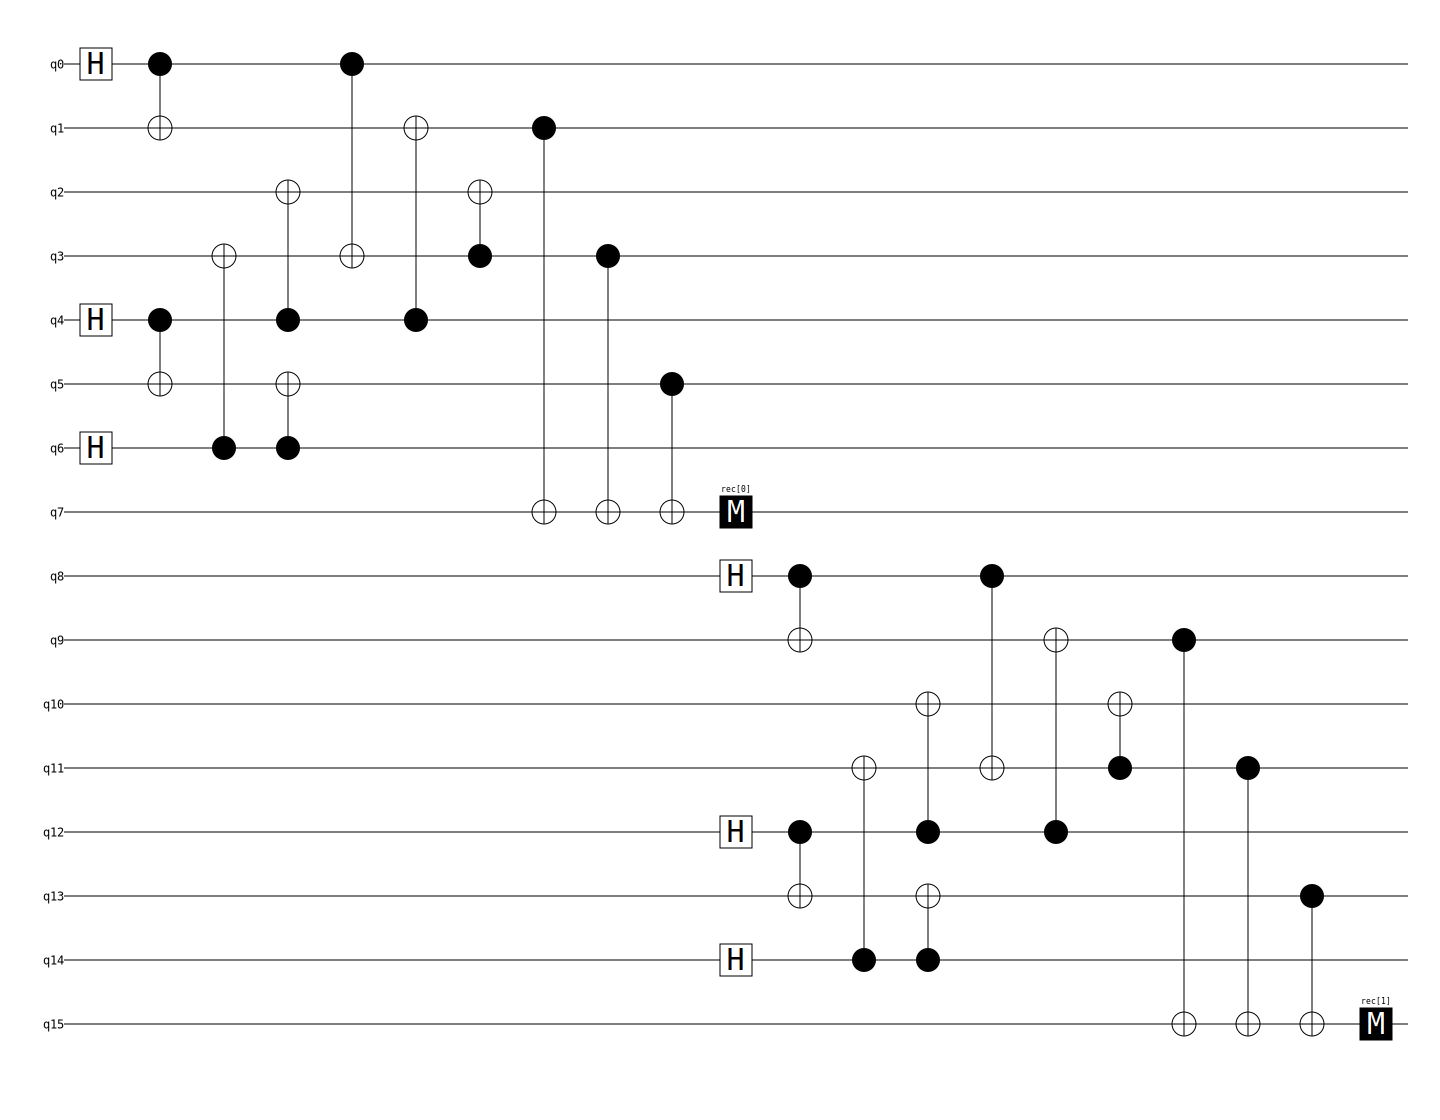

In [188]:
c.diagram("timeline-svg")

#### Logical CNOT Implementation

As shown in the lecture, CSS codes allow for transversal implementation of logical entangling gates such as the logical CNOT gate. 
In the Steane code the logical transversal CNOT gate is simply the pairwise CNOT between physical qubits at the same index of their respective logical qubit.  

Let's write a method that implements the logical CNOT:

In [189]:
def logical_cnot(ctrl_idx: int, target_idx: int) -> stim.Circuit:
    """Implement a transversal CNOT by applying CNOT between physical
    qubits of the logical qubits"""
    c = stim.Circuit()
    if ctrl_idx == target_idx:
        raise ValueError("Control index cannot be equal target index")

    offset_ctrl = ctrl_idx * 8
    offset_target = target_idx * 8

    for i in range(7):
        c.append("CNOT", [i + offset_ctrl, i + offset_target])

    return c

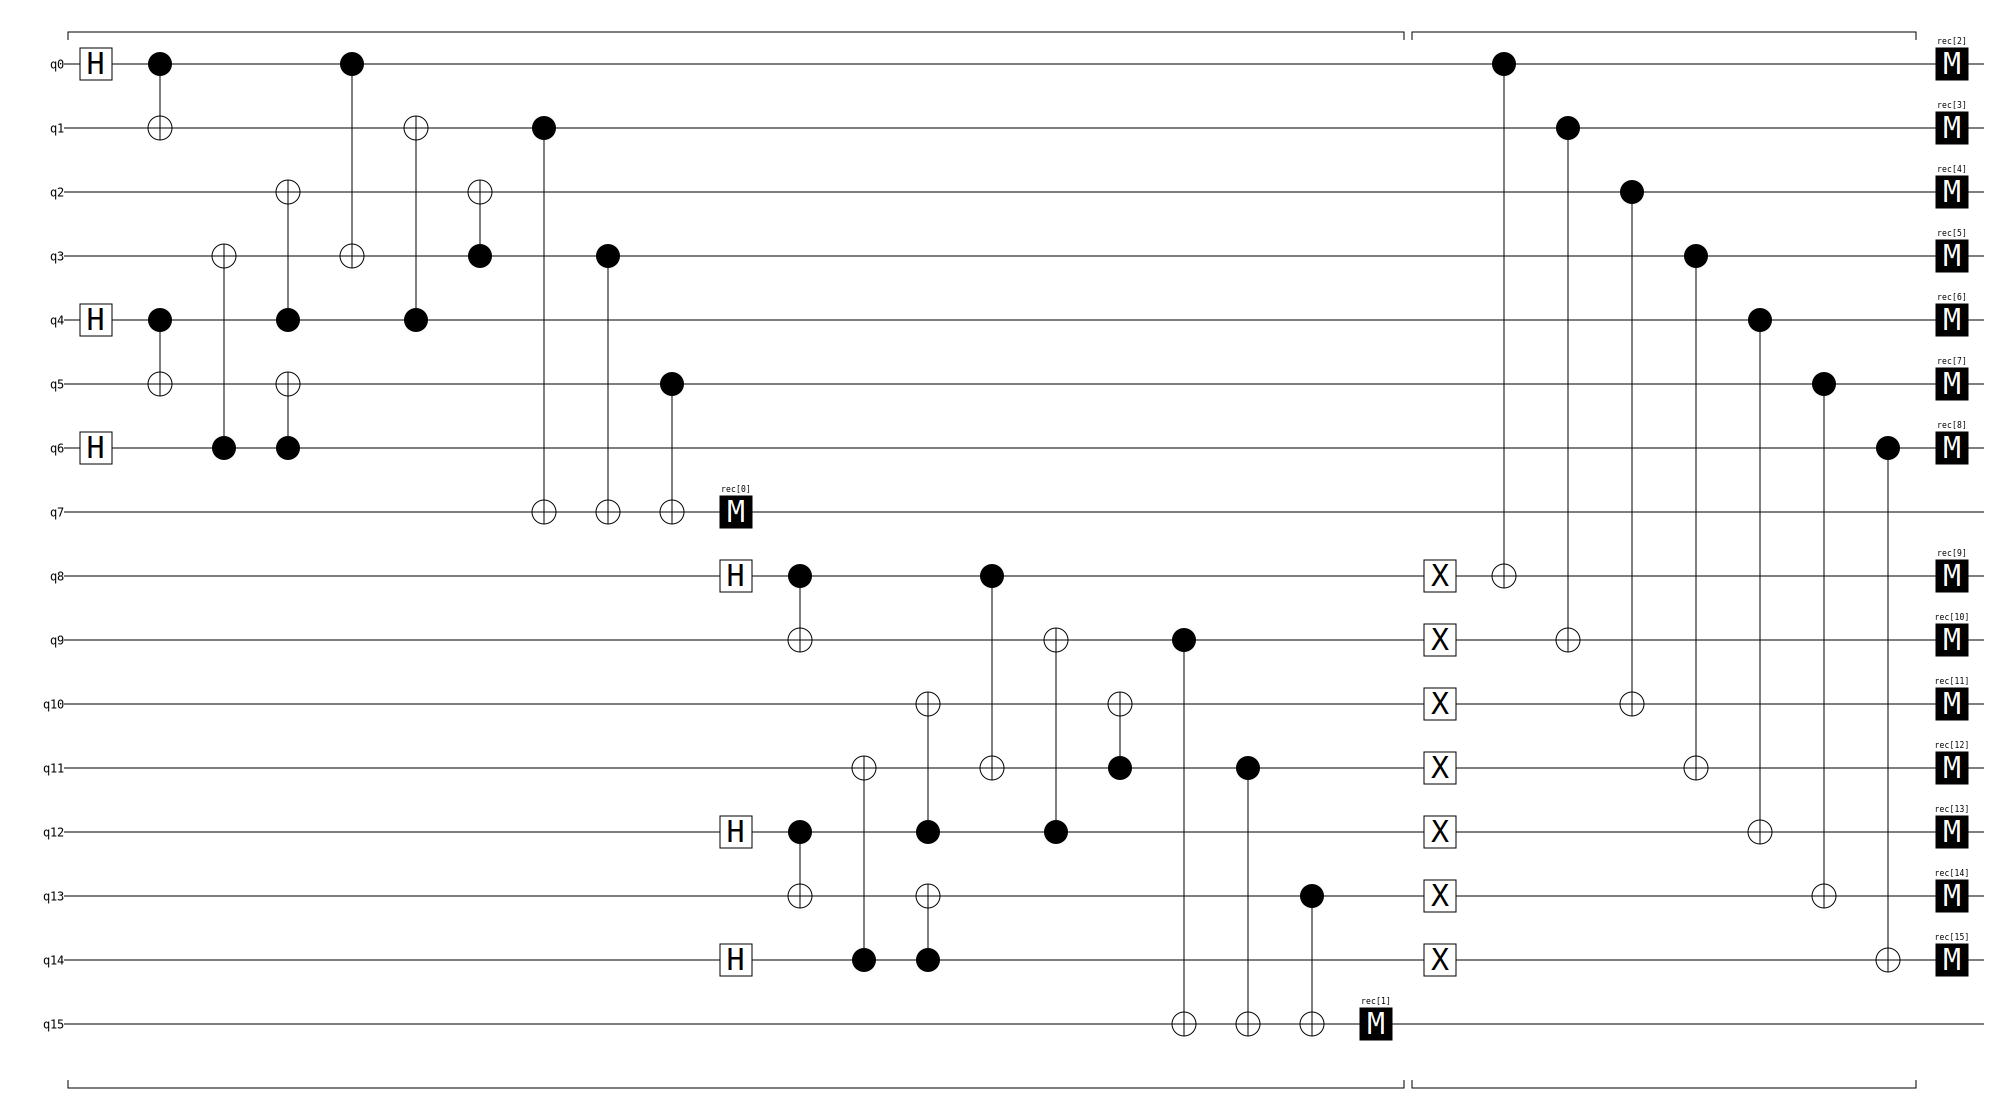

In [220]:
# Before applying the logical CNOT, we flip the control logical qubit to be able to test our gate
# prepare |0>_L x |0>_L
c = stim.Circuit()
c += encoding_circuit(log_qb_idx=0)
c += encoding_circuit(log_qb_idx=1)
c.append("TICK")
c += logical_single_qubit_gate(gate="X", log_qb_idx=1)
c += logical_cnot(ctrl_idx=0, target_idx=1)
c.append("TICK")
c += measure_logical_qubits(log_qubit_indices=[0, 1])
c.diagram("timeline-svg")

In [221]:
r = sample_from_circuit(c, shots=10)
logical_measurement_output_qb1 = r[:, 6] ^ r[:, 7] ^ r[:, 8]
logical_measurement_output_qb2 = r[:, 6 + 7] ^ r[:, 7 + 7] ^ r[:, 8 + 7]
print('Q0:',logical_measurement_output_qb1)
print('Q1:',logical_measurement_output_qb2)

Q0: [0 0 0 0 0 0 0 0 0 0]
Q1: [1 1 1 1 1 1 1 1 1 1]


In [222]:
# compute stabilizers for bell-state
t = c.to_tableau(ignore_measurement=True)
print("Stabilizers")
t.to_stabilizers()

Stabilizers


[stim.PauliString("+XXXX____XXXX____"),
 stim.PauliString("+ZZ__Z___________"),
 stim.PauliString("+__ZZZ___________"),
 stim.PauliString("+Z__Z__Z_________"),
 stim.PauliString("+_XX_XX___XX_XX__"),
 stim.PauliString("+____ZZZ_________"),
 stim.PauliString("+__XX_XX___XX_XX_"),
 stim.PauliString("+_Z_Z_Z_Z________"),
 stim.PauliString("+________XXXX____"),
 stim.PauliString("-ZZ__Z___ZZ__Z___"),
 stim.PauliString("-__ZZZ_____ZZZ___"),
 stim.PauliString("-Z__Z__Z_Z__Z__Z_"),
 stim.PauliString("+_________XX_XX__"),
 stim.PauliString("-____ZZZ_____ZZZ_"),
 stim.PauliString("+__________XX_XX_"),
 stim.PauliString("-_Z_Z_Z___Z_Z_Z_Z")]

You are looking at the **"DNA" of a Logical Bell Pair**.

Do not worry about the number 49. The reason you see **16 lines** is very simple: **You have 16 physical qubits.**

Here is the breakdown of why the output looks this way and how to read it.

### 1. The Math: Why 16 lines?

A quantum state is defined by its **Generators**.

* **Rule:** To uniquely define a pure state on  qubits, you need exactly  independent stabilizer generators.
* **Your Circuit:**
* Logical Qubit 0: 7 data + 1 ancilla = 8 qubits.
* Logical Qubit 1: 7 data + 1 ancilla = 8 qubits.
* **Total:**  qubits.


* **Result:** You get exactly **16 stabilizer rows**.

*(The number 49 would imply something like , but stabilizers don't multiply that way. They scale linearly with the number of qubits: Add 1 qubit  Add 1 row.)*

### 2. Anatomy of the 16 Rows

These 16 lines are not just random strings; they are doing three distinct jobs. We can group them by what they protect.

#### **Group A: The Ancilla Flags (2 Rows)**

These verify that your state preparation succeeded.

* Look at rows like `+_X_X_X_Z_X_X_X__` (Line 8) and `+_Z_Z_Z___Z_Z_Z_Z` (Line 16).
* These involve the 8th and 16th qubits (the ancillas). They confirm the internal parity checks of each logical block are correct.

#### **Group B: The Code Stabilizers (12 Rows)**

These define the "Steane Code" structure. They ensure your qubits are valid logical codewords and not just random noise.

* Normally these look local (e.g., `XXXX` on the first 7 qubits).
* **However,** because you applied a **Transversal CNOT**, these stabilizers have "spread."
* Look at Line 2: `+XX__X___XX__X___`.
* It has `XX__X` on the first block (Left) **AND** `XX__X` on the second block (Right).
* This shows the **CNOT** in action: The -stabilizer from the control qubit copied itself to the target qubit.



#### **Group C: The Logical Entanglement (2 Rows)**

These are the most important rows. They prove you have a Bell State ().

* **Logical X correlation:** Look for a row that is mostly s on *both* sides. (Line 2 or 3 implies this correlation).
* : "If I flip Block 1, Block 2 flips too."


* **Logical Z correlation:** Look for a row that is mostly s on *both* sides. (Line 10 or 14).
* : "The phase of Block 1 is linked to the phase of Block 2."



### 3. Why does it look so messy?

You might expect to see nice clean rows like `XXXX.......` and `.......XXXX`.
Instead, you see mixed rows like `+XX__X___XX__X___`.

This is due to **Transversal Gates**.

1. You applied `CNOT` between every pair of qubits (, , etc.).
2. **Rule of CNOT:**
*  propagates from Control  Target ().
*  propagates from Target  Control ().


3. **Result:** The stabilizers of the first code block have physically merged with the stabilizers of the second block.

### Summary

* **Count:** 16 Qubits = 16 Rows. Correct.
* **Structure:** The "messy" repeating patterns (Left part matching Right part) are the fingerprint of the **Transversal CNOT**. They prove the two logical qubits are intimately connected at the physical level.

## Remind me why number of stabilizers is equal to number of physical qubits and how can I figure out from the stablizers how many logical qubits are encoded?"